In [1]:
import os
working_dir = os.getcwd()
print working_dir
os.chdir('..')
from ml_helpers import *
os.chdir(working_dir)

/mldb_data/titantic


In [2]:
#get the data
import pandas as pd
import urllib, os

tdata_dir = '../data/titantic'

ttrain_data = pd.read_csv(tdata_dir + '/train.csv')
ttrain_data.head(10)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14,1,0,237736,30.0708,NaN,C


In [3]:
ttrain_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


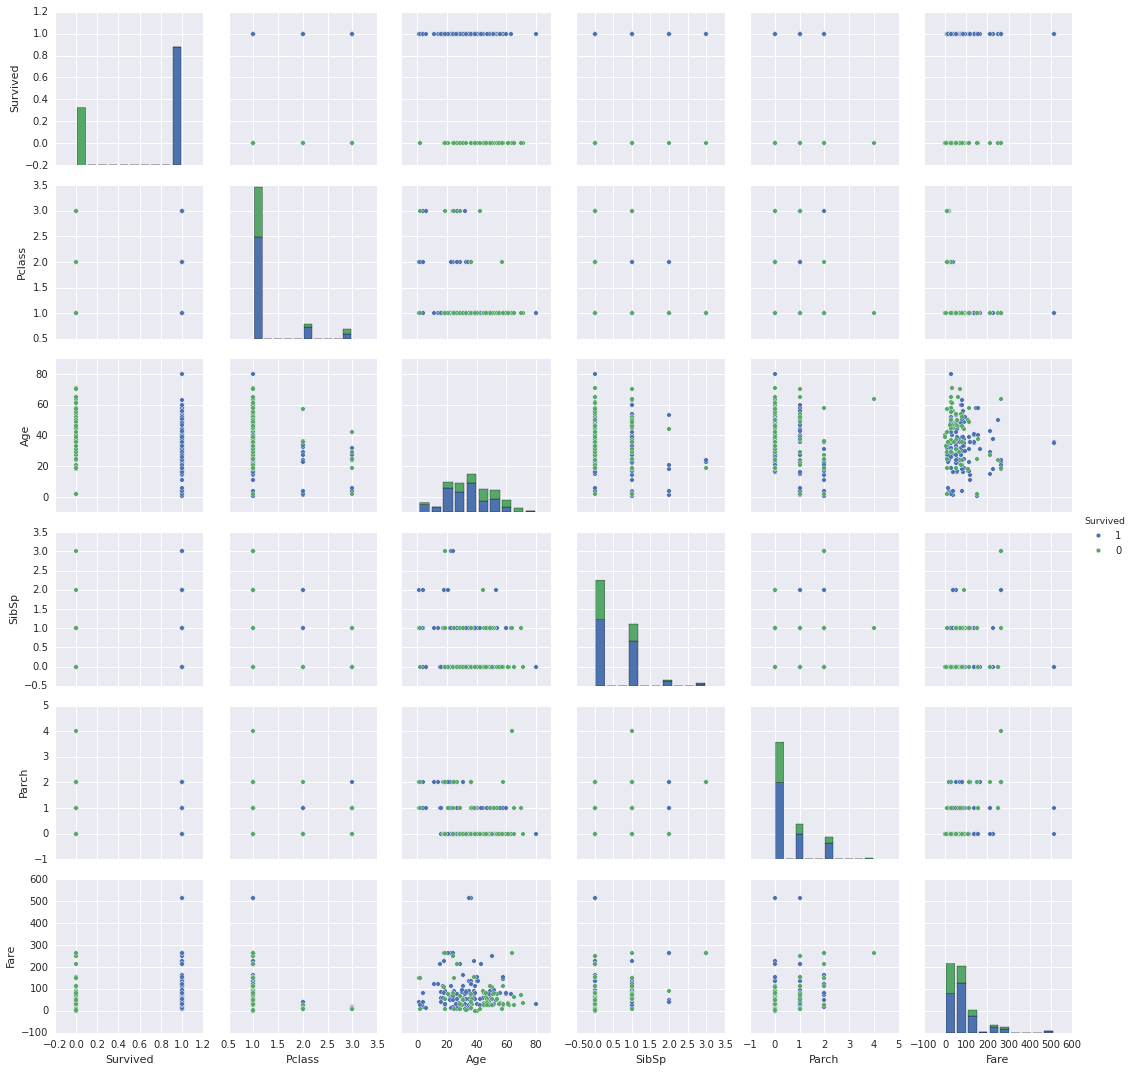

In [4]:
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sb

# sb.pairplot(ttrain_data.iloc() , hue='Survived')
titantic_pair_plot = sb.pairplot(ttrain_data.iloc[:,1:].dropna(), hue='Survived')

In [5]:
ttrain_data.loc[1,:]

PassengerId                                                    2
Survived                                                       1
Pclass                                                         1
Name           Cumings, Mrs. John Bradley (Florence Briggs Th...
Sex                                                       female
Age                                                           38
SibSp                                                          1
Parch                                                          0
Ticket                                                  PC 17599
Fare                                                     71.2833
Cabin                                                        C85
Embarked                                                       C
Name: 1, dtype: object

In [6]:
data = ttrain_data.copy()

In [7]:
def replace_missing_values_with_mean(df, col, query, round=True):
    mean = df.query(query)

In [8]:
pclass1_average_age = data.loc[data['Pclass'] == 1, 'Age'].mean()
pclass2_average_age = data.loc[data['Pclass'] == 2, 'Age'].mean()
pclass3_average_age = data.loc[data['Pclass'] == 3, 'Age'].mean()

print 'Average Age of Pclass1 = {0:.3f}'.format(pclass1_average_age)
print 'Average Age of Pclass2 = {0:.3f}'.format(pclass2_average_age)
print 'Average Age of Pclass3 = {0:.3f}'.format(pclass3_average_age)

Average Age of Pclass1 = 38.233
Average Age of Pclass2 = 29.878
Average Age of Pclass3 = 25.141


In [9]:
# fill ages for people with missing values from the mean

data.loc[(data['Pclass'] == 1) &
               (data['Age'].isnull()), 'Age'] = round(pclass1_average_age)

data.loc[(data['Pclass'] == 2) &
               (data['Age'].isnull()), 'Age'] = round(pclass2_average_age)

data.loc[(data['Pclass'] == 3) &
               (data['Age'].isnull()), 'Age'] = round(pclass3_average_age)


In [10]:
assert len( data.loc[data['Age'].isnull(),:] ) == 0 

In [11]:
data[0:10]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,25,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14,1,0,237736,30.0708,NaN,C


In [12]:
all_inputs_raw = data.iloc[:,[2,4,5,6,7,9,11]].values
all_inputs_raw[1]

array([1, 'female', 38.0, 1, 0, 71.2833, 'C'], dtype=object)

In [13]:
from sklearn.preprocessing import label_binarize
all_inputs_raw[:,1] = label_binarize(all_inputs_raw[:,1], classes=[ 'female', 'male']).T


In [14]:
all_inputs_raw

array([[3, 1, 22.0, ..., 0, 7.25, 'S'],
       [1, 0, 38.0, ..., 0, 71.2833, 'C'],
       [3, 0, 26.0, ..., 0, 7.925, 'S'],
       ..., 
       [3, 0, 25.0, ..., 2, 23.45, 'S'],
       [1, 1, 26.0, ..., 0, 30.0, 'C'],
       [3, 1, 32.0, ..., 0, 7.75, 'Q']], dtype=object)

In [15]:
import numpy as np
embarked_array = label_binarize(all_inputs_raw[:,6], classes=[ 'S', 'C', 'Q'])
all_inputs = np.hstack(( all_inputs_raw[:,0:6] , embarked_array ))
all_inputs[0:5]

/usr/local/lib/python2.7/dist-packages/numpy/lib/arraysetops.py:198: FutureWarning: numpy not_equal will not check object identity in the future. The comparison did not return the same result as suggested by the identity (`is`)) and will change.
  flag = np.concatenate(([True], aux[1:] != aux[:-1]))


array([[3, 1, 22.0, 1, 0, 7.25, 1, 0, 0],
       [1, 0, 38.0, 1, 0, 71.2833, 0, 1, 0],
       [3, 0, 26.0, 0, 0, 7.925, 1, 0, 0],
       [1, 0, 35.0, 1, 0, 53.1, 1, 0, 0],
       [3, 1, 35.0, 0, 0, 8.05, 1, 0, 0]], dtype=object)

In [16]:
all_classes = data.iloc[:,1].values
all_classes[0:10]

array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1])

In [17]:
from sklearn.cross_validation import train_test_split

(training_inputs,
testing_inputs,
training_classes,
testing_classes) = train_test_split(all_inputs, all_classes, train_size=0.9, random_state=1)

In [18]:
## get matrix sizes:

print training_inputs.shape
print testing_inputs.shape
print training_classes.shape
print testing_classes.shape

(801, 9)
(90, 9)
(801,)
(90,)


In [19]:
from sklearn.tree import DecisionTreeClassifier

#train the classifier
decision_tree_classifier = DecisionTreeClassifier()
decision_tree_classifier.fit(training_inputs, training_classes)

#validate the classifier on the testing set
decision_tree_classifier.score(testing_inputs, testing_classes)

0.76666666666666672

In [20]:
from sklearn.metrics import confusion_matrix

confusion_matrix(testing_classes, decision_tree_classifier.predict(testing_inputs))

array([[42, 11],
       [10, 27]])

In [21]:
# model_accuracies = []

# for repetition in range(1000):
#     (training_inputs,
#      testing_inputs,
#      training_classes,
#      testing_classes) = train_test_split(all_inputs, all_classes, train_size=0.75)
    
#     decision_tree_classifier = DecisionTreeClassifier()
#     decision_tree_classifier.fit(training_inputs, training_classes)
#     classifier_accuracy = decision_tree_classifier.score(testing_inputs, testing_classes)
#     model_accuracies.append(classifier_accuracy)
    
# fig = sb.distplot(model_accuracies)

# fig.get_figure().savefig('Titantic_decision_tree_accuracy_1000CV.png')


In [22]:
import sklearn.tree as tree
from sklearn.externals.six import StringIO

with open('titantic_dt_noprune.dot', 'w') as out_file:
    out_file = tree.export_graphviz(decision_tree_classifier, out_file=out_file)
    dot_data = StringIO()
    tree.export_graphviz(decision_tree_classifier, out_file=dot_data)

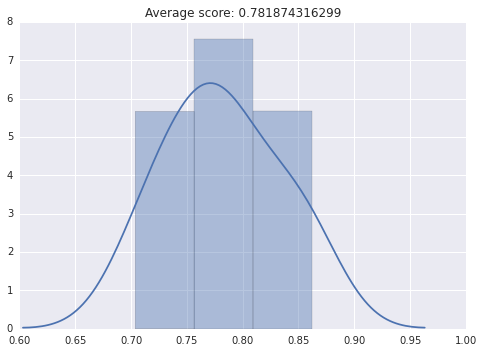

In [23]:
from sklearn.cross_validation import cross_val_score

decision_tree_classifier = DecisionTreeClassifier()

# cross_val_score returns a list of the scores, which we can visualize
# to get a reasonable estimate of our classifier's performance
cv_scores = cross_val_score(decision_tree_classifier, training_inputs, training_classes, cv=10)
sb.distplot(cv_scores)
plt.title('Average score: {}'.format(np.mean(cv_scores)))
plt.savefig('naive-10fold-cross-val-score.png')

In [24]:
from sklearn.grid_search import GridSearchCV

decision_tree_classifier = DecisionTreeClassifier()

parameter_grid = {'criterion': ['gini','entropy'],
                  'splitter': ['random', 'best'],
                 'max_depth': [1,2,3,4,5,6,7,8,9,10,11,12,13,14],
                 'max_features': [1,2,3,4,5,6,7,8,9]}

cross_validation = StratifiedKFold(training_classes, n_folds=10)

%time dt_grid_search = GridSearchCV(decision_tree_classifier,param_grid=parameter_grid,cv=cross_validation)
dt_grid_search.fit(all_inputs, all_classes)
print('Best score: {}'.format(dt_grid_search.best_score_))
print('Best parameters: {}'.format(dt_grid_search.best_params_))

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 22.2 µs
Best score: 0.822721598002
Best parameters: {'max_features': 5, 'splitter': 'best', 'criterion': 'gini', 'max_depth': 7}


In [25]:
print dt_grid_search.best_score_

0.822721598002


In [26]:
decision_tree_classifier = dt_grid_search.best_estimator_
with open('titantic_dt_prune.dot', 'w') as out_file:
    out_file = tree.export_graphviz(decision_tree_classifier, out_file=out_file)

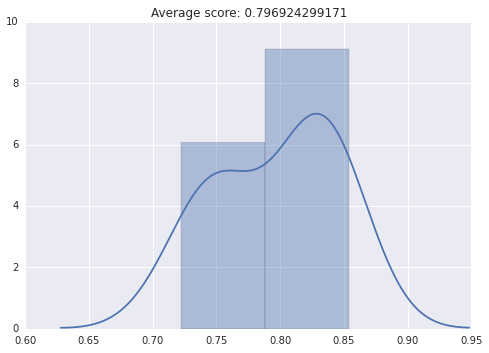

In [27]:
# cross_val_score returns a list of the scores, which we can visualize
# to get a reasonable estimate of our classifier's performance
cv_scores = cross_val_score(decision_tree_classifier, all_inputs, all_classes, cv=10)
sb.distplot(cv_scores)
plt.title('Average score: {}'.format(np.mean(cv_scores)))


In [28]:
grid_search.best_estimator_??


Object `grid_search.best_estimator_` not found.


(801, 9)
CPU times: user 188 ms, sys: 40 ms, total: 228 ms
Wall time: 338 ms
train test sizes: [ 72 144 216 288 360 432 504 576 648 720]
train scores means: [ 0.97777778  0.94097222  0.90092593  0.8875      0.88583333  0.87962963
  0.87678571  0.88854167  0.88256173  0.88166667]
train scores std: [ 0.00921285  0.01326734  0.01632888  0.01523036  0.01071877  0.01419418
  0.01415421  0.00751959  0.00645387  0.00591869]
test scores mean: [ 0.72203821  0.7703106   0.76180985  0.79447043  0.784438    0.80558115
  0.79920613  0.80029946  0.80534732  0.80412779]
test scores std: [ 0.04911784  0.05896692  0.03767709  0.05276161  0.06005396  0.0510082
  0.03061395  0.04206709  0.03567346  0.03446307]


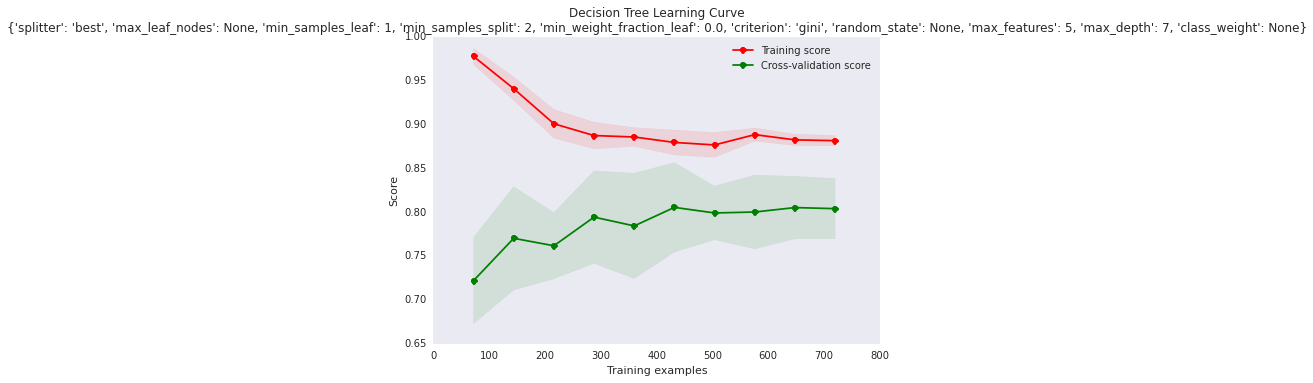

In [29]:
import numpy as np

# def make_learning_curve(classifier, X, y, 
#                         cv=None, 
#                         train_sizes=np.linspace(.1, 1.0, 10) ):
#     """
#     Generate output of the learning curve using a given classifier and feature sets and class designation. 
#     """
    
#     cv = cv or StratifiedKFold(y, n_folds=10)
    
#     train_sizes, train_scores, test_scores = learning_curve(classifier,
#                                             X,
#                                             y,
#                                             cv=cv,
#                                             train_sizes=[100,300],
#                                             n_jobs=-1)
#     return (train_sizes, train_scores, test_scores)


decision_tree_classifier = dt_grid_search.best_estimator_
print training_inputs.shape

%time dt_lc_output = make_learning_curve(decision_tree_classifier, training_inputs, training_classes, cv=10, train_sizes=np.linspace(.1,1.0,10) )

dt_lc_plot = plot_learning_curve_from_learning_curve_data('Decision Tree Learning Curve\n{}'.format(dt_grid_search.best_estimator_.get_params()), *dt_lc_output)
dt_lc_plot.savefig('tuned_dt_learning_curve.png')

In [30]:
dt_final_score = decision_tree_classifier.score(testing_inputs, testing_classes)
print dt_final_score
confusion_matrix(testing_classes, decision_tree_classifier.predict(testing_inputs))

0.811111111111


array([[53,  0],
       [17, 20]])

In [31]:
# TODO - make violin plots with this data

## boosting

In [32]:
# from sklearn.ensemble import AdaBoostClassifier

# model_accuracies = []

# for repetition in range(1000):
#     (training_inputs,
#      testing_inputs,
#      training_classes,
#      testing_classes) = train_test_split(all_inputs, all_classes, train_size=0.75)
    
#     ada_boost_classifier = AdaBoostClassifier()
#     ada_boost_classifier.fit(training_inputs, training_classes)
#     classifier_accuracy = ada_boost_classifier.score(testing_inputs, testing_classes)
#     model_accuracies.append(classifier_accuracy)
    
# sb.distplot(model_accuracies)

CPU times: user 400 ms, sys: 0 ns, total: 400 ms
Wall time: 402 ms


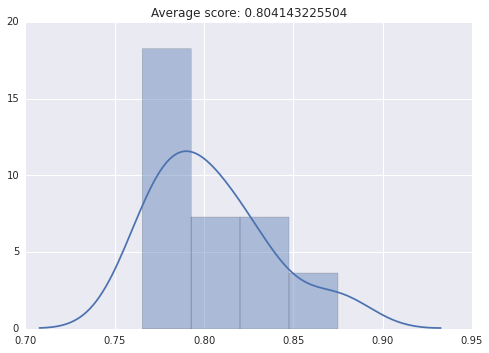

In [33]:
from sklearn.ensemble import AdaBoostClassifier
ada_boost_classifier = AdaBoostClassifier()
%time cv_scores = cross_val_score(ada_boost_classifier, training_inputs, training_classes, cv=10)
sb.distplot(cv_scores)
plt.title('Average score: {}'.format(np.mean(cv_scores)))
plt.savefig('naive_ada_boost_cross_val')

In [34]:
from sklearn.grid_search import GridSearchCV
import time

def make_grid_search(classifier,parameter_grid , all_inputs, all_classes, cv=None):
    cross_validation = cv or StratifiedKFold(all_classes, n_folds=10)
    grid_search = GridSearchCV(classifier,param_grid=parameter_grid,cv=cross_validation)
    start = time.time()
    %time grid_search.fit(all_inputs, all_classes)
    print('Best score: {}'.format(grid_search.best_score_))
    print('Best parameters: {}'.format(grid_search.best_params_))
    return grid_search, time.time() - start

In [35]:
ada_boost_classifier = AdaBoostClassifier()
parameter_grid = {'n_estimators': [10,25,50,75,100,200,300],
                 'learning_rate': [0.01,0.1,1,2,5],
                 'algorithm': ['SAMME', 'SAMME.R']}
ada_boost_grid, ada_grid_time = make_grid_search(ada_boost_classifier, parameter_grid, training_inputs, training_classes )                                

print ada_grid_time

CPU times: user 53.1 s, sys: 0 ns, total: 53.1 s
Wall time: 53.2 s
Best score: 0.813982521848
Best parameters: {'n_estimators': 75, 'learning_rate': 1, 'algorithm': 'SAMME.R'}
53.162006855


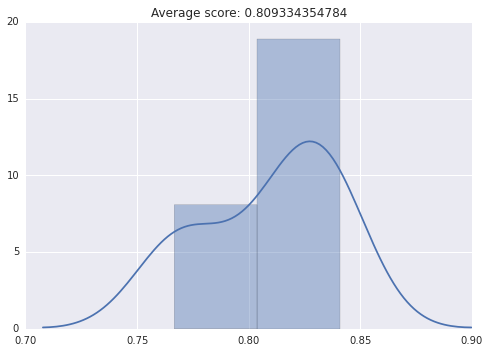

In [36]:
ada_boost_classifier = ada_boost_grid.best_estimator_
cv_scores = cross_val_score(ada_boost_classifier, all_inputs, all_classes, cv=10)
sb.distplot(cv_scores)
plt.title('Average score: {}'.format(np.mean(cv_scores)))

CPU times: user 192 ms, sys: 56 ms, total: 248 ms
Wall time: 346 ms
train test sizes: [ 80 160 240 320 400 480 560 640 720 801]
train scores means: [ 0.9775      0.91875     0.90916667  0.87375     0.8875      0.88166667
  0.88196429  0.87359375  0.87791667  0.87602996]
train scores std: [ 0.01346291  0.01811422  0.01391941  0.02201739  0.01616323  0.01252775
  0.0084685   0.01359375  0.01038328  0.00919194]
test scores mean: [ 0.74531211  0.74528686  0.76222903  0.79582624  0.79369141  0.79581347
  0.79581319  0.80472619  0.82384037  0.80362728]
test scores std: [ 0.02755796  0.03714532  0.04226254  0.02530844  0.05709814  0.03843045
  0.03386158  0.04491953  0.0355876   0.04211787]


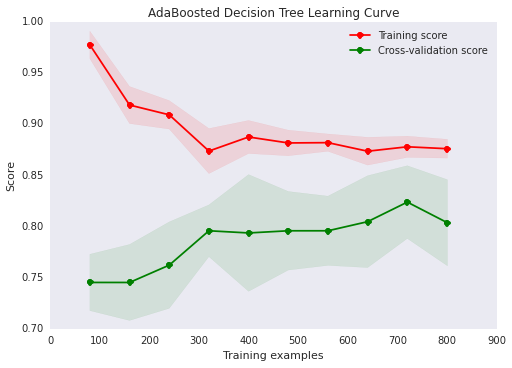

In [37]:
from sklearn.tree import DecisionTreeClassifier

base_classifier = DecisionTreeClassifier(max_features=9, splitter='random', criterion='entropy', max_depth=8)
base_classifier = DecisionTreeClassifier()
ada_boost_classifier = AdaBoostClassifier( base_estimator=base_classifier, **ada_boost_grid.best_params_)

%time boost_lc_output = make_learning_curve(decision_tree_classifier, all_inputs, all_classes, train_sizes=np.linspace(.1,1.0,10) )
boost_lc_plot = plot_learning_curve_from_learning_curve_data('AdaBoosted Decision Tree Learning Curve', *boost_lc_output)
boost_lc_plot.savefig('adaboost_learning_curve.png')

In [38]:
from sklearn.metrics import confusion_matrix

def show_score(classifier, train_input, train_output, test_input, test_output):
    classifier.fit(train_input, train_output)
    score = classifier.score(test_input, test_output)
    print score
#     confusion_matrix(test_input, classifier.predict(test_input, test_output))

In [39]:
ada_final_score = show_score( ada_boost_grid.best_estimator_,training_inputs, training_classes, testing_inputs, testing_classes )

0.777777777778


## Neural nets

In [40]:
# from sknn.mlp import Classifier, Layer  

# from sklearn.pipeline import Pipeline
# from sklearn.preprocessing import MinMaxScaler


# pipeline = Pipeline([
#         ('min/max scalar', MinMaxScaler(feature_range=(0.0, 1.0))),
#         ('neural network', Classifier(layers=[Layer("Softmax")], n_iter=50))
#     ])

# # pipeline.fit(all_inpute, all_classes)


# %time cv_scores = cross_val_score(pipeline, training_inputs,training_classes, cv=10)
# sb.distplot(cv_scores)
# plt.title('Average score: {}'.format(np.mean(cv_scores)))


In [41]:
# from scipy import stats

# from sknn.mlp import Classifier, Layer  

# from sklearn.pipeline import Pipeline
# from sklearn.preprocessing import MinMaxScaler
# from sklearn.grid_search import RandomizedSearchCV

# # pipeline = Pipeline([
# #         ('min/max scalar', MinMaxScaler(feature_range=(0.0, 1.0))),
# #         ('neural network', Classifier)
# #     ])

# nn = Classifier(layers=[Layer('Rectifier'),Layer("Softmax")], n_iter=25)

# nn_inputs = MinMaxScaler().fit_transform(all_inputs)


# rs = RandomizedSearchCV(nn, param_distributions={
#     'learning_rate': stats.uniform(0.001, 0.05),
#     'hidden0__units': stats.randint(2, 12),
#     'hidden0__type': ["Rectifier", "Sigmoid", "Tanh"],
#     'regularize':["L2",'']})

# # pipeline.fit(all_inpute, all_classes)
# rs.fit(nn_inputs, all_classes)

# print('Best score: {}'.format(rs.best_score_))
# print('Best parameters: {}'.format(rs.best_params_))

# # cv_scores = cross_val_score(pipeline, all_inputs, all_classes, cv=10)
# # sb.distplot(cv_scores)
# # plt.title('Average score: {}'.format(np.mean(cv_scores)))

In [42]:
from scipy import stats

from sknn.mlp import Classifier, Layer  

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.grid_search import RandomizedSearchCV



# pipeline = Pipeline([
#         ('min/max scalar', MinMaxScaler(feature_range=(0.0, 1.0))),
#         ('neural network', Classifier)
#     ])

nn = Classifier(layers=[Layer('Rectifier'),Layer("Softmax")], n_iter=50)

nn_inputs = MinMaxScaler().fit_transform(training_inputs)

nn_test_input = MinMaxScaler()fit_transform(testing_inputs)

rs = RandomizedSearchCV(nn, param_distributions={
    'learning_rate': stats.uniform(0.001, 0.05),
    'hidden0__units': stats.randint(2, 12),
    'hidden0__type': ["Rectifier", "Sigmoid", "Tanh"],
    'regularize':["L2",None]})

# pipeline.fit(all_inpute, all_classes)
%time rs.fit(nn_inputs, training_classes)

print('Best score: {}'.format(rs.best_score_))
print('Best parameters: {}'.format(rs.best_params_))

# cv_scores = cross_val_score(pipeline, all_inputs, all_classes, cv=10)
# sb.distplot(cv_scores)
# plt.title('Average score: {}'.format(np.mean(cv_scores)))

SyntaxError: invalid syntax (<ipython-input-42-c13a05be32ec>, line 20)

In [ ]:
# from scipy import stats

# from sknn.mlp import Classifier, Layer  

# from sklearn.pipeline import Pipeline
# from sklearn.preprocessing import MinMaxScaler
# from sklearn.grid_search import RandomizedSearchCV

# # pipeline = Pipeline([
# #         ('min/max scalar', MinMaxScaler(feature_range=(0.0, 1.0))),
# #         ('neural network', Classifier)
# #     ])

# nn = Classifier(layers=[Layer('Rectifier')
#                         Layer('Rectifier'),
#                         Layer("Softmax")], n_iter=100)

# nn_inputs = MinMaxScaler().fit_transform(all_inputs)


# rs = RandomizedSearchCV(nn, param_distributions={
#     'learning_rate': stats.uniform(0.001, 0.05),
#     'hidden0__units': stats.randint(2, 12),
#     'hidden0__type': ["Rectifier", "Sigmoid", "Tanh"],
#     'regularize':["L2",'']})

# # pipeline.fit(all_inpute, all_classes)
# rs.fit(nn_inputs, all_classes)

# print('Best score: {}'.format(rs.best_score_))
# print('Best parameters: {}'.format(rs.best_params_))


In [ ]:
nn_classifier = Classifier(layers=[Layer('Rectifier', units=8),Layer("Softmax")],learning_rate=0.0019, n_iter=50, regularize=None)
cv_scores = cross_val_score(classifier, nn_inputs, training_classes, cv=10)
sb.distplot(cv_scores)
plt.title('Average score: {}'.format(np.mean(cv_scores)))

In [ ]:
nn_classifier = Classifier(layers=[Layer('Rectifier', units=10),Layer("Softmax")],learning_rate=0.0219, n_iter=50)


%time nn_lc_output = make_learning_curve(nn_classifier, nn_inputs, training_classes, cv=3, train_sizes=np.linspace(0.1,1.0, 8))
nn_lc_plot = plot_learning_curve_from_learning_curve_data('Neural Net Decision Tree Learning Curve 50 iters', *nn_lc_output)
nn_lc_plot.savefig('neural_net_lc_50iter.png')

In [ ]:
nn_classifier = Classifier(layers=[Layer('Rectifier', units=10),Layer("Softmax")],learning_rate=0.0219, n_iter=100)


%time nn_lc_output = make_learning_curve(nn_classifier, nn_inputs, training_classes, cv=3, train_sizes=np.linspace(0.1,1.0, 8))
nn_lc_plot = plot_learning_curve_from_learning_curve_data('Neural Net Decision Tree Learning Curve 100 iterations', *nn_lc_output)
nn_lc_plot.savefig('neural_net_lc_100iter.png')

In [ ]:
nn_classifier = Classifier(layers=[Layer('Rectifier', units=10),Layer("Softmax")],learning_rate=0.0219, n_iter=500)


%time nn_lc_output = make_learning_curve(nn_classifier, nn_inputs, training_classes, cv=3, train_sizes=np.linspace(0.1,1.0, 8))
nn_lc_plot = plot_learning_curve_from_learning_curve_data('Neural Net Decision Tree Learning Curve 500 iterations', *nn_lc_output)
nn_lc_plot.savefig('neural_net_lc_500iter.png')

In [ ]:

nn_test_inputs = MinMaxScaler().fit_transform(testing_inputs)

In [ ]:
from sklearn.metrics import confusion_matrix

def show_score(classifier, train_input, train_output, test_input, test_output):
    classifier.fit(train_input, train_output)
    score = classifier.score(test_input, test_output)
    print score

nn = Classifier(layers=[Layer('Rectifier', units=10),Layer("Softmax")],learning_rate=0.0219, n_iter=100)
nn.fit(nn_inputs, training_classes)
nn_final_score=show_score(nn, nn_inputs, training_classes, nn_test_inputs, testing_classes )

## K-nearest neighbor

In [ ]:
# from sklearn.neighbors import KNeighborsClassifier

# model_accuracies = []

# for repetition in range(1000):
#     (training_inputs,
#      testing_inputs,
#      training_classes,
#      testing_classes) = train_test_split(all_inputs, all_classes, train_size=0.75)
    
#     classifier = KNeighborsClassifier()
#     classifier.fit(training_inputs, training_classes)
#     classifier_accuracy = classifier.score(testing_inputs, testing_classes)
#     model_accuracies.append(classifier_accuracy)
    
# sb.distplot(model_accuracies)


In [ ]:
print training_inputs.shape
print training_classes.shape


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier()
parameter_grid = {'n_neighbors': [1,5,10,20,30,50,100],
                 'weights': ['uniform','distance'],
                 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                 'leaf_size': [1,5,10,20,30,50,100]}
                                
cross_validation = StratifiedKFold(training_classes, n_folds=10)

%time grid_search = GridSearchCV(classifier,param_grid=parameter_grid,cv=cross_validation)

grid_search.fit(training_inputs, training_classes)
print('Best score: {}'.format(grid_search.best_score_))
print('Best parameters: {}'.format(grid_search.best_params_))

In [ ]:
classifier = grid_search.best_estimator_
cv_scores = cross_val_score(classifier, training_inputs, training_classes, cv=10)
sb.distplot(cv_scores)
plt.title('Average score: {}'.format(np.mean(cv_scores)))

In [ ]:
knn_classifier = KNeighborsClassifier(**grid_search.best_params_)

%time knn_lc_output = make_learning_curve(knn_classifier, training_inputs, training_classes, train_sizes=np.linspace(0.1,1.0, 8))
knn_lc_plot = plot_learning_curve_from_learning_curve_data('KNN\n{}\nLearning Curve'.format(knn_classifier.get_params()), *knn_lc_output)
knn_lc_plot.savefig('knn_best_learning_curve.png')

In [ ]:
def show_score(classifier, train_input, train_output, test_input, test_output):
    classifier.fit(train_input, train_output)
    score = classifier.score(test_input, test_output)
    print score

knn_final_score=show_score(knn_classifier, training_inputs, training_classes, testing_inputs, testing_classes )

## Support Vector Machine

In [ ]:
# from sklearn.svm import SVC

# model_accuracies = []

# for repetition in range(1000):
#     (training_inputs,
#      testing_inputs,
#      training_classes,
#      testing_classes) = train_test_split(all_inputs, all_classes, train_size=0.75)
    
#     classifier = SVC()
#     classifier.fit(training_inputs, training_classes)
#     classifier_accuracy = classifier.score(testing_inputs, testing_classes)
#     model_accuracies.append(classifier_accuracy)
    
# sb.distplot(model_accuracies)

In [ ]:
SVC?

In [ ]:
from sklearn.svm import SVC
from sklearn.grid_search import GridSearchCV


classifier = SVC()
parameter_grid = {'kernel': ['rbf','linear'],
#                   #'degree': [2,3,4],#,5,6],
                  }
                                

grid_search = GridSearchCV(classifier, param_grid=parameter_grid, cv=3, n_jobs=-1, verbose=1)

%time grid_search.fit(training_inputs, training_classes)
print('Best score: {}'.format(grid_search.best_score_))
print('Best parameters: {}'.format(grid_search.best_params_))

In [ ]:
#classifier = grid_search.best_estimator_
#cv_scores = cross_val_score(classifier, all_inputs, all_classes, cv=10)
#sb.distplot(cv_scores)
#plt.title('Average score: {}'.format(np.mean(cv_scores)))

In [ ]:
svm_classifier = grid_search.best_estimator_

%time svn_lc_output = make_learning_curve(svm_classifier, training_inputs, training_classes)
svn_lc_plot = plot_learning_curve_from_learning_curve_data('SVN Learning Curve Linear kernel', *svn_lc_output)
svn_lc_plot.savefig('svm_final_learning_curve.png')

In [ ]:
svm_classifier.score(testing_inputs, testing_classes)